# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 进入 mmclassification 目录

In [1]:
import os
os.chdir('mmclassification')

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-23 09:22:12--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  17.7MB/s    in 0.5s    

2022-08-23 09:22:12 (17.7 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [4]:
df = pd.read_csv('work_dirs/mobilenet_v2_1x_fruit30/各类别准确率评估指标.csv')

In [5]:
df

,类别,precision,recall,f1-score,support,AP,AUC
0,哈密瓜,0.911765,0.837838,0.873239,37.0,0.960852,0.997637
1,圣女果,0.702128,0.868421,0.776471,38.0,0.867181,0.993978
2,山竹,0.944444,0.971429,0.957746,35.0,0.998456,0.999945
3,杨梅,0.916667,0.891892,0.904110,37.0,0.977591,0.998910
4,柚子,0.833333,0.675676,0.746269,37.0,0.834844,0.985227
5,柠檬,0.642857,0.931034,0.760563,29.0,0.767079,0.990007
6,桂圆,0.973684,0.973684,0.973684,38.0,0.999325,0.999975
7,梨,0.875000,0.756757,0.811594,37.0,0.896257,0.984163
8,椰子,0.937500,0.789474,0.857143,38.0,0.926248,0.992105
9,榴莲,0.795455,0.972222,0.875000,36.0,0.972024,0.998401


## 选择评估指标

In [14]:
# feature = 'precision'
feature = 'recall'
# feature = 'f1-score'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

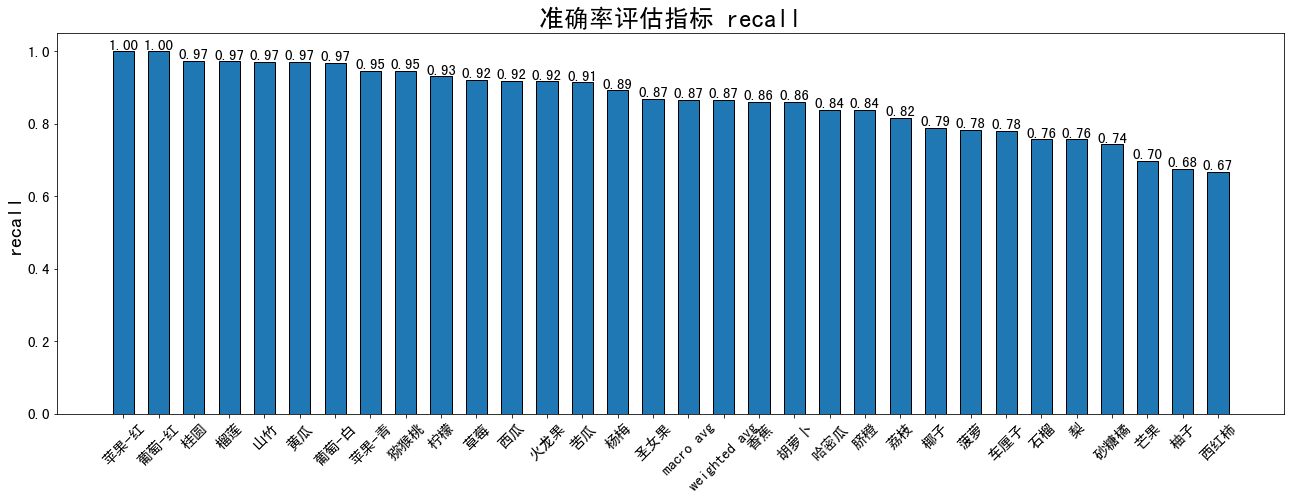

In [15]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()